In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading

In [45]:
data = pd.read_csv('/content/drive/My Drive/Datasets/airlinedelaycauses_DelayedFlights.csv')
data = data.dropna()
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [0]:
#data = data.drop('Unnamed: 0', axis=1)
#data = data.drop('index', axis=1)

#data.head()

In [46]:
data.shape

(1247486, 30)

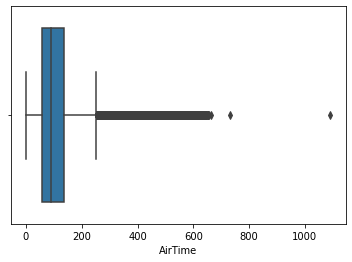

In [47]:
import seaborn as sns
sns.boxplot(x=data['AirTime'])


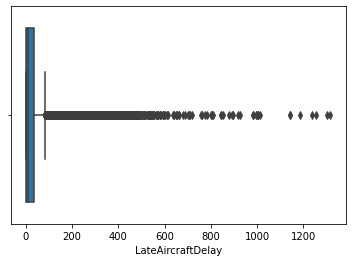

In [48]:
sns.boxplot(x=data['LateAircraftDelay'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 3 to 1936755
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1247486 non-null  int64  
 1   Year               1247486 non-null  int64  
 2   Month              1247486 non-null  int64  
 3   DayofMonth         1247486 non-null  int64  
 4   DayOfWeek          1247486 non-null  int64  
 5   DepTime            1247486 non-null  float64
 6   CRSDepTime         1247486 non-null  int64  
 7   ArrTime            1247486 non-null  float64
 8   CRSArrTime         1247486 non-null  int64  
 9   UniqueCarrier      1247486 non-null  object 
 10  FlightNum          1247486 non-null  int64  
 11  TailNum            1247486 non-null  object 
 12  ActualElapsedTime  1247486 non-null  float64
 13  CRSElapsedTime     1247486 non-null  float64
 14  AirTime            1247486 non-null  float64
 15  ArrDelay           1247486 non-n

In [34]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##Feature Selection

In [51]:
from sklearn.preprocessing import normalize
X = data.iloc[:, [14,29]].values   # considering only 2 features (Annual Income (k$), Spending Score (1-100))
X.shape

(1247486, 2)

###SPlit Dataset into training and testing

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test =  train_test_split(X,test_size=0.20,random_state=70)
X_test.shape, X_train.shape


((249498, 2), (997988, 2))

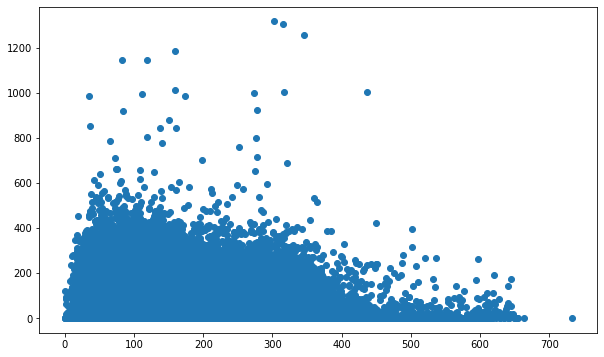

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0],X_train[:,1])

##K-Means Model

In [0]:
from sklearn.cluster import KMeans
wcss = []


In [0]:
#we shall use the elbow method to figure out the number of Ks to use.
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #sum of squared of the distance of each data point in all clusters to their respective centroids

#inertia_ is the formula used to segregate the data points into clusters

###Visualize the ELBOW method

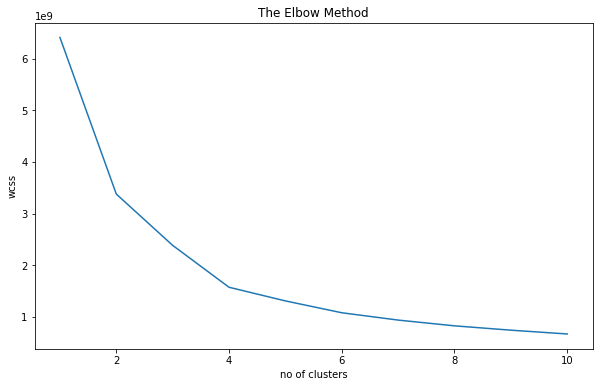

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), np.asarray(wcss))
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

We have determined based on where the last elbow is that the appropriate number of clusters for this dataset is 3. Therefore, our K = 4

In [0]:
##Model Build
model = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_hat = model.fit_predict(X_train)

###Visualise the Clusters

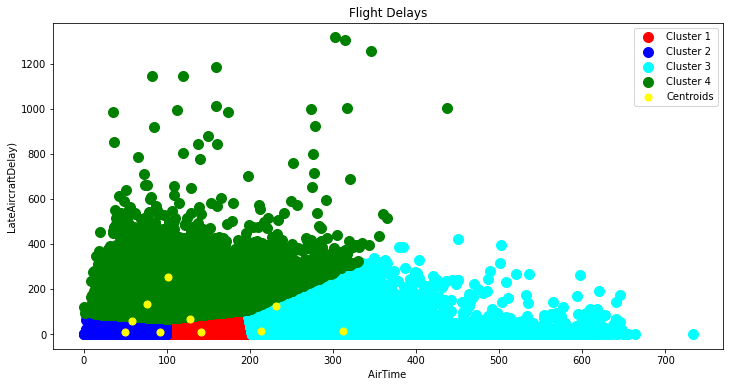

In [84]:
plt.figure(figsize=(12,6))
plt.scatter(X_train[y_hat == 0, 0], X_train[y_hat == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_hat == 1, 0], X_train[y_hat == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_hat == 2, 0], X_train[y_hat == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X_train[y_hat == 3, 0], X_train[y_hat == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
#plt.scatter(X_train[y_hat == 4, 0], X_train[y_hat == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Flight Delays')
plt.xlabel('AirTime ')
plt.ylabel('LateAircraftDelay)')
plt.legend()
plt.show()

###Model Interpretation 
* Cluster 1 (Red Color) -> average airtime, highest late aircraft delay [TARGET SET]
* cluster 2 (Blue Colr) -> short airtime, short delay
* cluster 3 ((cyan Colorr) -> high flight time, minimal delay [TARGET SET]
* cluster 4 (Green Color) -> short airtime, short delay


In [83]:
print(kmeans.predict(X))

[4 0 2 ... 6 4 2]
